# **데이터 시각화**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **mpg data 시각화**

In [2]:
df = pd.read_csv('mpg.csv')

In [4]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


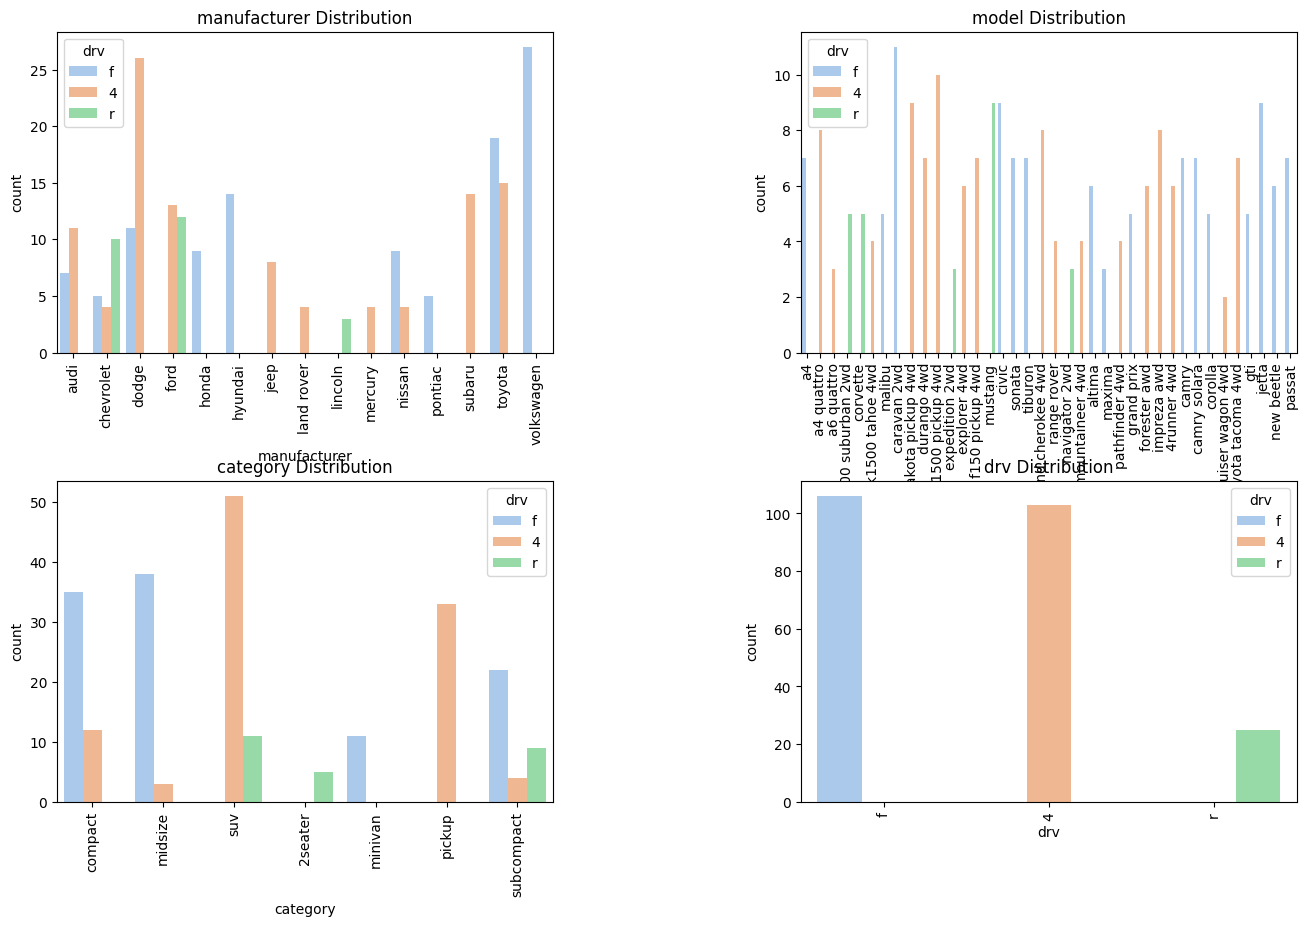

In [5]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(2,2) # 4가지 그래프
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace=0.4) # 그래프 여러 개 그려질 경우 충돌 방지

mpg_features = ['manufacturer','model','category','drv'] # 범주형 데이터

for idx, feature in enumerate(mpg_features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=feature, data=df, hue='drv', palette='pastel', ax=ax)
    plt.xticks(rotation=90) # x축의 값을 축전환하는 코드
    ax.set_title(f'{feature} Distribution')

### **titanic data 시각화**

In [6]:
df = sns.load_dataset('titanic')

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

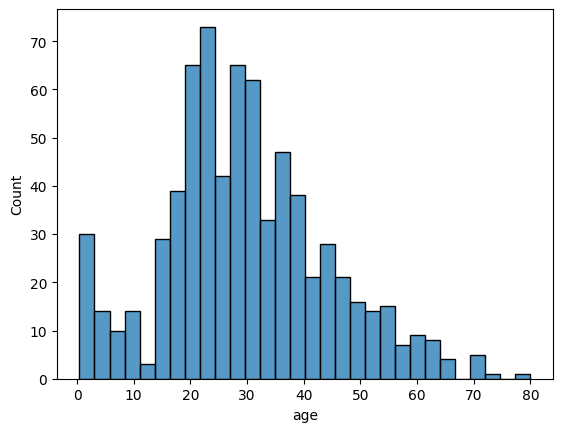

In [9]:
sns.histplot(df['age'], bins=30)

kde : 연속확률분포 그래프

<Axes: xlabel='age', ylabel='Count'>

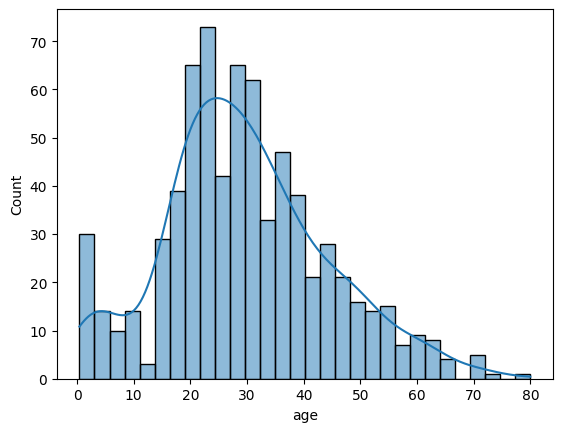

In [10]:
sns.histplot(df['age'], bins=30, kde=True)

<Axes: xlabel='pclass', ylabel='age'>

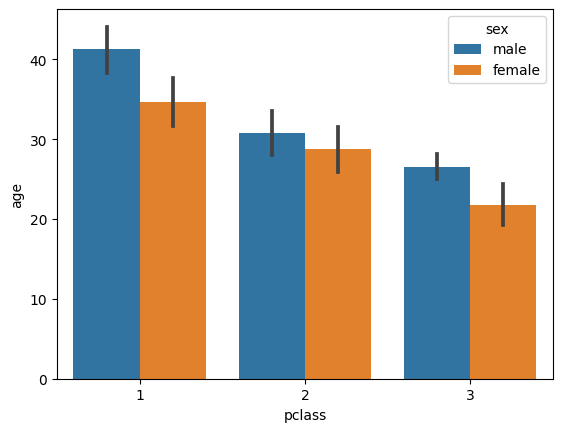

In [14]:
sns.barplot(x ='pclass', y='age', hue='sex', data=df)

<Axes: xlabel='pclass', ylabel='age'>

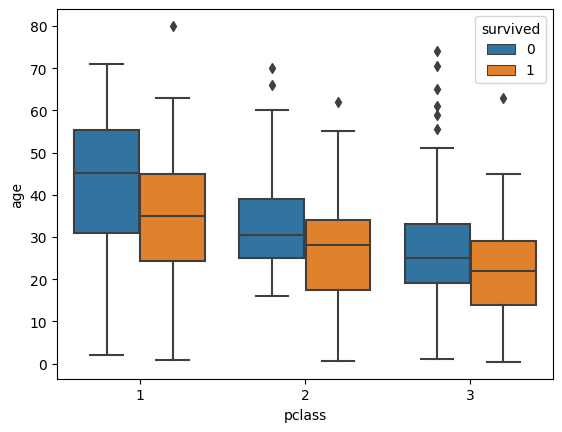

In [15]:
sns.boxplot(x='pclass', y='age', hue='survived', data=df)

바이올린차트 : 연속확률분포 곡선 대칭으로 그리고, 가운데 박스플롯 그림

<Axes: xlabel='pclass', ylabel='age'>

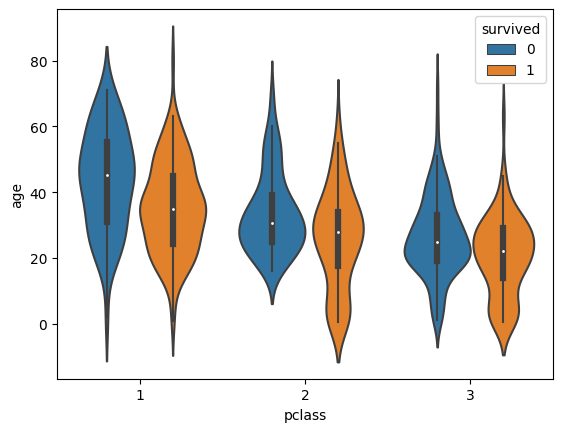

In [16]:
sns.violinplot(x='pclass', y='age', hue='survived', data= df)

# **시계열 데이터**
- 시간의 흐름에 따라 데이터 특성 생성
- 시계열은 랜덤하게 나눌 수가 없음
- time 관련으로 나눠서 데이터 분할

---



In [17]:
import datetime

In [18]:
date = datetime.date(year=2023, month=11, day=26)
time = datetime.time(hour= 23, minute=29, second=5, microsecond=1234)

In [19]:
date

datetime.date(2023, 11, 26)

In [20]:
time

datetime.time(23, 29, 5, 1234)

In [21]:
dt = datetime.datetime(year=2023, month=11, day=26, hour= 23, minute=29, second=5, microsecond=1234)

In [22]:
dt

datetime.datetime(2023, 11, 26, 23, 29, 5, 1234)

In [23]:
# timedelta
td = datetime.timedelta(days=31)

In [24]:
td

datetime.timedelta(days=31)

In [25]:
print(date + td)

2023-12-27


In [26]:
print(dt+td)

2023-12-27 23:29:05.001234


### to_datetime

In [27]:
pd.to_datetime('2023-11-26')

Timestamp('2023-11-26 00:00:00')

In [28]:
eg_dt = pd.Series(['2023-11-26','2023/11/26','2023.11.26','26-11-2023','26/11/2023','2023-13-26','2023-11-32'])

In [29]:
pd.to_datetime(eg_dt, dayfirst=True , errors='coerce')

0   2023-11-26
1   2023-11-26
2   2023-11-26
3   2023-11-26
4   2023-11-26
5          NaT
6          NaT
dtype: datetime64[ns]

## crime data 실습

In [30]:
df = pd.read_csv('crime.csv')

In [31]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


#### 시계열 데이터 타입으로 변환하기

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [33]:
df['REPORTED_DATE']= pd.to_datetime(df['REPORTED_DATE'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


#### index 지정하기

In [35]:
df = df.set_index('REPORTED_DATE')

In [36]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


#### 원하는 날짜 뽑을 수 있음

In [37]:
df.loc['2016-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2016-09-13 10:58:00,22153,assault-dv,other-crimes-against-persons,-105.027174,39.711779,barnum,1,0
2016-09-07 20:07:00,23119,assault-dv,other-crimes-against-persons,-105.024461,39.663195,college-view-south-platte,1,0
2016-09-26 08:39:00,23666,robbery-car-jacking,robbery,-104.886954,39.660187,hampden,1,0
2016-09-06 10:10:00,28075,criminal-mischief-other,public-disorder,-104.998806,39.728065,lincoln-park,1,0
2016-09-07 02:20:00,28193,traf-other,all-other-crimes,-104.994183,39.764766,globeville,1,0
...,...,...,...,...,...,...,...,...
2016-09-25 10:38:00,378634,criminal-mischief-mtr-veh,public-disorder,-105.051793,39.730096,villa-park,1,0
2016-09-26 11:00:00,378635,fraud-identity-theft,white-collar-crime,-104.971468,39.746133,city-park-west,1,0
2016-09-13 16:03:00,378760,assault-simple,other-crimes-against-persons,-105.039861,39.676497,harvey-park,1,0


In [38]:
df.loc['Dec 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-12-19 17:42:00,1219,traffic-accident,traffic-accident,-104.940355,39.781688,northeast-park-hill,0,1
2014-12-06 08:25:00,1225,disturbing-the-peace,public-disorder,-104.817529,39.773653,montbello,1,0
2014-12-19 08:29:00,1301,burglary-residence-no-force,burglary,-104.901114,39.729047,lowry-field,1,0
2014-12-01 22:13:00,1322,liquor-possession,drug-alcohol,-104.966870,39.738576,cheesman-park,1,0
2014-12-30 08:26:00,1341,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037817,39.771111,berkeley,1,0
...,...,...,...,...,...,...,...,...
2014-12-18 22:36:00,377801,criminal-trespassing,all-other-crimes,-104.999197,39.739042,lincoln-park,1,0
2014-12-10 19:35:00,377834,assault-simple,other-crimes-against-persons,-105.033088,39.706098,westwood,1,0
2014-12-16 13:51:00,379049,assault-simple,other-crimes-against-persons,-104.921734,39.753780,north-park-hill,1,0


In [39]:
df.between_time('13:00','16:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-01-24 13:49:00,12,theft-from-bldg,larceny,-104.934536,39.731625,hale,1,0
2012-02-27 15:23:00,17,theft-other,larceny,-104.958944,39.724311,cherry-creek,1,0
2012-08-06 15:15:00,23,traffic-accident,traffic-accident,-104.940404,39.688629,virginia-village,0,1
2014-03-28 14:45:00,41,traf-other,all-other-crimes,-105.024949,39.681388,college-view-south-platte,1,0
2012-02-17 14:03:00,45,traffic-accident,traffic-accident,-104.940639,39.675705,university-hills,0,1
...,...,...,...,...,...,...,...,...
2017-09-12 13:40:00,460894,burglary-business-by-force,burglary,-105.010854,39.765525,highland,1,0
2017-09-12 13:40:00,460901,theft-of-motor-vehicle,auto-theft,-104.897151,39.726858,lowry-field,1,0
2017-09-12 15:33:00,460904,public-peace-other,public-disorder,-104.977033,39.737631,capitol-hill,1,0


### **resample** 함수

In [40]:
df_crime = df[['IS_CRIME']]

In [41]:
df_crime.resample('Y').sum()

,IS_CRIME
REPORTED_DATE,
2012-12-31,37286
2013-12-31,50698
2014-12-31,62690
2015-12-31,65894
2016-12-31,67381
2017-12-31,51902


In [42]:
df_crime.resample('D').mean()

,IS_CRIME
REPORTED_DATE,
2012-01-02,0.548387
2012-01-03,0.598131
2012-01-04,0.597315
2012-01-05,0.652778
2012-01-06,0.671329
...,...
2017-09-25,0.674797
2017-09-26,0.735632
2017-09-27,0.738007
